In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

In [49]:
data = {'t':[4,0,3,5,6,1,5,7,7,4,6,8], 'q1':[1,0,0,0,1,0,0,0,1,0,0,0], 'q2':[0,1,0,0,0,1,0,0,0,1,0,0], 'q3':[0,0,1,0,0,0,1,0,0,0,1,0], 'q4': [0,0,0,1,0,0,0,1,0,0,0,1], 'y':[1,2,3,4,5,6,7,8,9,10,11,12]}

In [50]:
df = pd.DataFrame(data)

<AxesSubplot:>

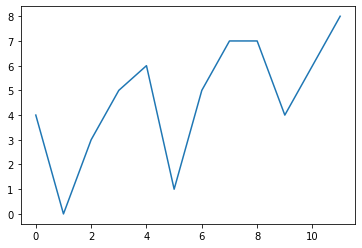

In [51]:
df['t'].plot()

In [92]:
inputs = df[['q1','q2','q3','y']]
targets = df['t']

In [93]:
sm_inputs = sm.add_constant(inputs)

In [94]:
model = sm.OLS(targets, sm_inputs).fit()

In [95]:
model.summary()

/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      t   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     71.66
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           9.24e-06
Time:                        22:11:34   Log-Likelihood:                -4.7150
No. Observations:                  12   AIC:                             19.43
Df Residuals:                       7   BIC:                             21.85
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4167      0.428      7.975      0.000       2.404       4.430
q1             0.2187      0.403      0.543      0.604      -0.734       1.171
q2            -4.1875      0.392    -10.681      0.000      -5.115      -3.260
q3            -1.5937      0.385     -4.135      0.004      -2.505      -0.682
y              0.4062      0.041      9.794      0.000       0.308       0.504
==============================================================================
Omnibus:                        0.169   Durbin-Watson:                   2.939
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.154
Skew:                           0.173   Prob(JB):                        0.926
Kurtosis:                       2.565   Cond. No.                         36.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
model.params[0] + model.params[4] * 16

9.916666666666643

In [97]:
predictions = model.predict(sm_inputs)

In [98]:
answer = (df['t'] - predictions)

In [99]:
answer = answer**2

In [100]:
answer.mean()

0.12847222222222224